<a href="https://colab.research.google.com/github/Skriller18/Model_Comparisons/blob/main/VGG_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/cropweed1/train'
test_dir = '/content/drive/MyDrive/cropweed1/test'
input_size = (224, 224)
batch_size = 32

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation data should not be augmented
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'binary' if you have 2 classes only
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'binary' if you have 2 classes only
)


Found 320 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


In [ ]:
# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers to avoid overfitting on a small dataset
for layer in base_model.layers:
    layer.trainable = False

# Add custom classifier on top
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(2, activation='softmax')(x)  # Use 'sigmoid' activation for binary classification

model_1 = Model(inputs=base_model.input, outputs=output)

# Compile the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
epochs = 10

# Fit the model
gistory_1 = model_1.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)


Epoch 1/10
10/10 [==============================] - 496s 50s/step - loss: 2.1759 - accuracy: 0.6187 - val_loss: 1.1631 - val_accuracy: 0.6585
Epoch 2/10
10/10 [==============================] - 160s 16s/step - loss: 0.7852 - accuracy: 0.7750 - val_loss: 0.2366 - val_accuracy: 0.9390
Epoch 3/10
10/10 [==============================] - 160s 16s/step - loss: 0.2461 - accuracy: 0.9031 - val_loss: 0.2168 - val_accuracy: 0.9268
Epoch 4/10
10/10 [==============================] - 147s 15s/step - loss: 0.1449 - accuracy: 0.9500 - val_loss: 0.1722 - val_accuracy: 0.9634
Epoch 5/10
10/10 [==============================] - 148s 15s/step - loss: 0.0912 - accuracy: 0.9781 - val_loss: 0.1687 - val_accuracy: 0.9268
Epoch 6/10
10/10 [==============================] - 149s 15s/step - loss: 0.1042 - accuracy: 0.9594 - val_loss: 0.1522 - val_accuracy: 0.9390
Epoch 7/10
10/10 [==============================] - 145s 15s/step - loss: 0.0988 - accuracy: 0.9625 - val_loss: 0.1514 - val_accuracy: 0.9268
Epoch 

In [ ]:
#Plotting our loss curves
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot loss
  plt.plot(epochs, loss, label="Training_loss")
  plt.plot(epochs, val_loss, label="Validation_loss")
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.ylabel("Losses")
  plt.legend()

  #Plot accuracy curves
  plt.figure()
  plt.plot(epochs, accuracy, label="Training_accuracy")
  plt.plot(epochs, val_accuracy, label="Validation_accuracy")
  plt.title("Accuracy curves")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()


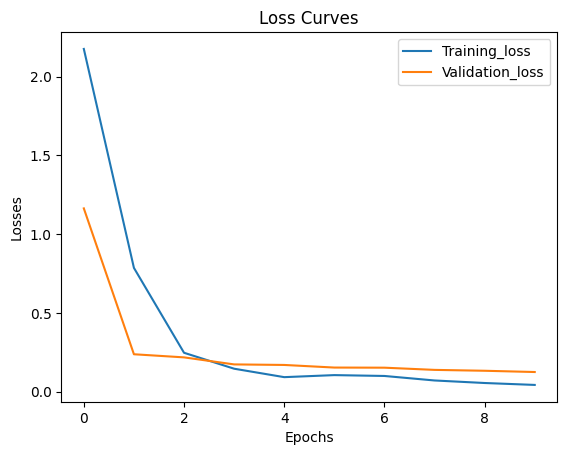

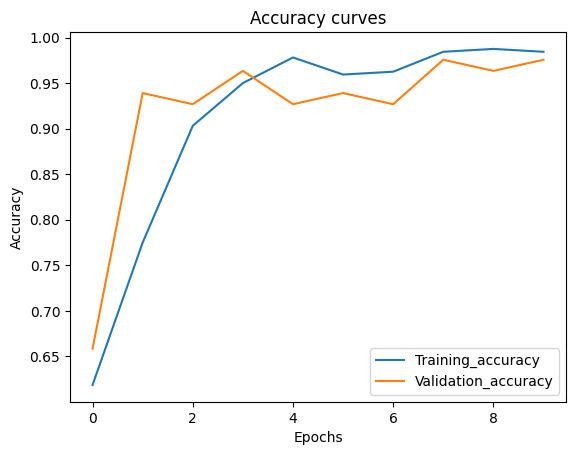

In [ ]:
plot_loss_curves(gistory_1)

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model_2 = Model(inputs=base_model.input, outputs=output)

# Compile the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_dir = '/content/drive/MyDrive/cropweed2/train'
test_dir = '/content/drive/MyDrive/cropweed2/test'
input_size = (224, 224)
batch_size = 32

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation data should not be augmented
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'binary' if you have 2 classes only
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_size,
    batch_size=batch_size,
    class_mode='categorical'  # Change to 'binary' if you have 2 classes only
)


Found 320 images belonging to 2 classes.
Found 82 images belonging to 2 classes.


In [12]:
epochs = 10

# Fit the model
history_2 = model_2.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)


Epoch 1/10
10/10 [==============================] - 110s 11s/step - loss: 0.0855 - accuracy: 0.9688 - val_loss: 0.0701 - val_accuracy: 0.9756
Epoch 2/10
10/10 [==============================] - 100s 10s/step - loss: 0.0819 - accuracy: 0.9688 - val_loss: 0.0794 - val_accuracy: 0.9634
Epoch 3/10
10/10 [==============================] - 108s 11s/step - loss: 0.0669 - accuracy: 0.9812 - val_loss: 0.0824 - val_accuracy: 0.9756
Epoch 4/10
10/10 [==============================] - 99s 10s/step - loss: 0.0547 - accuracy: 0.9750 - val_loss: 0.0886 - val_accuracy: 0.9634
Epoch 5/10
10/10 [==============================] - 105s 11s/step - loss: 0.0454 - accuracy: 0.9812 - val_loss: 0.0706 - val_accuracy: 0.9634
Epoch 6/10
10/10 [==============================] - 106s 11s/step - loss: 0.0623 - accuracy: 0.9781 - val_loss: 0.0662 - val_accuracy: 0.9634
Epoch 7/10
10/10 [==============================] - 124s 13s/step - loss: 0.0469 - accuracy: 0.9875 - val_loss: 0.0923 - val_accuracy: 0.9756
Epoch 8

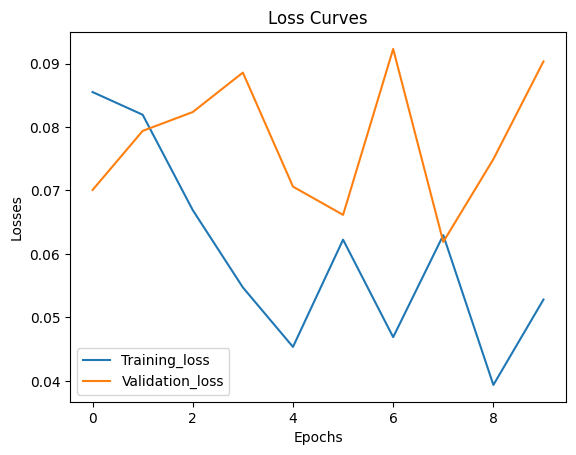

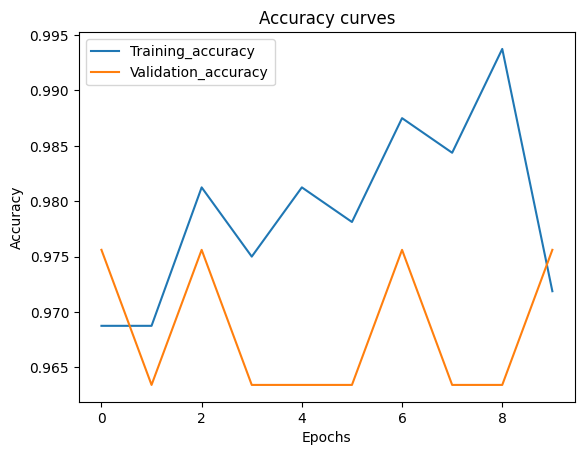

In [14]:
plot_loss_curves(history_2)